In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [2]:
df = pd.read_csv('../data/raw_data/dataset_rossi.csv')
df.head()

,Unnamed: 0,week,arrest,fin,age,race,wexp,mar,paro,prio
0,0,20,1,0,27,1,0,0,1,3
1,1,17,1,0,18,1,0,0,1,8
2,2,25,1,0,19,0,1,0,1,13
3,3,52,0,1,23,1,1,1,1,1
4,4,52,0,0,19,0,1,0,1,3


The dataset contains data from 432 convicts who were released from Maryland state prisons in the 1970s and were followed up with for one year after release. Half of the convicts were given financial aid as an experiment.

| Column | Description                                                        |
|--------|--------------------------------------------------------------------|
| week   | Duration in weeks                                                  |
| arrest | 1 if arrested; 0 if not arrested                                   |
| fin    | Financial aid - 1 if yes; 0 if no                                  |
| age    | Age in years                                                       |
| race   | 1 if Black; 0 if others                                            |
| wexp   | Full-time work experience before incarceration - 1 if yes; 0 if no |
| mar    | Marital status at time of release - 1 if married; 0 if not married |
| paro   | Released on parole - 1 if yes; 0 if no                             |
| prio   | Number of convictions prior to current incarceration               |

For this notebook, we will be predicting if a convict will be rearrested within 52 weeks of release based on these factors.

In [3]:
df.info() # No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  432 non-null    int64
 1   week        432 non-null    int64
 2   arrest      432 non-null    int64
 3   fin         432 non-null    int64
 4   age         432 non-null    int64
 5   race        432 non-null    int64
 6   wexp        432 non-null    int64
 7   mar         432 non-null    int64
 8   paro        432 non-null    int64
 9   prio        432 non-null    int64
dtypes: int64(10)
memory usage: 33.9 KB


In [4]:
# Drop unnamed column, already have index
df.drop(columns='Unnamed: 0', inplace=True)

In [5]:
df.describe()

,week,arrest,fin,age,race,wexp,mar,paro,prio
count,432.000000,432.000000,432.00000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,45.854167,0.263889,0.50000,24.597222,0.877315,0.571759,0.122685,0.618056,2.983796
std,12.662293,0.441251,0.50058,6.113375,0.328456,0.495398,0.328456,0.486426,2.896068
min,1.000000,0.000000,0.00000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,0.00000,20.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,52.000000,0.000000,0.50000,23.000000,1.000000,1.000000,0.000000,1.000000,2.000000
75%,52.000000,1.000000,1.00000,27.000000,1.000000,1.000000,0.000000,1.000000,4.000000
max,52.000000,1.000000,1.00000,44.000000,1.000000,1.000000,1.000000,1.000000,18.000000


In [6]:
df[df.duplicated(keep=False)].sort_values(by=['age', 'prio'])

,week,arrest,fin,age,race,wexp,mar,paro,prio
71,52,0,0,18,1,0,0,1,0
389,52,0,0,18,1,0,0,1,0
317,52,0,0,18,1,0,0,1,3
423,52,0,0,18,1,0,0,1,3
117,52,0,1,18,1,0,0,0,4
...,...,...,...,...,...,...,...,...,...
364,52,0,0,26,1,1,0,1,1
37,52,0,0,27,1,1,0,0,2
131,52,0,0,27,1,1,0,0,2
54,52,0,0,28,1,1,1,1,1


There are 79 duplicate rows in the dataset. However, since there are no identifying keys and the columns are not very unique to individuals, we will not drop them.

In [7]:
# drop week as not important in predicting arrest
df.drop(columns='week', inplace=True)

## EDA

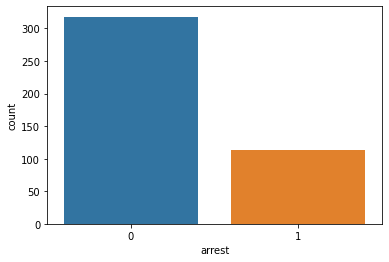

In [8]:
sns.countplot(data=df, x='arrest');

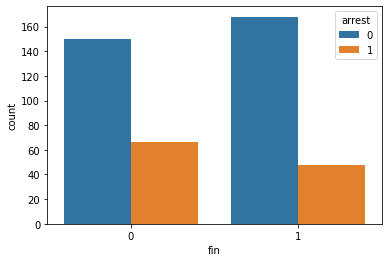

In [9]:
sns.countplot(data=df, x='fin', hue='arrest');

In [10]:
df.corr()['arrest']

arrest    1.000000
fin      -0.094538
age      -0.179836
race      0.031795
wexp     -0.139900
mar      -0.095831
paro     -0.026574
prio      0.163130
Name: arrest, dtype: float64

## Logistic Regression

In [11]:
df.columns

Index(['arrest', 'fin', 'age', 'race', 'wexp', 'mar', 'paro', 'prio'], dtype='object')

In [12]:
X = df.drop(columns='arrest')
y = df['arrest']

In [13]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
ss = StandardScaler()

In [14]:
X_sc = ss.fit_transform(X)

In [15]:
logreg = LogisticRegressionCV(n_jobs=-1, max_iter=1000)

In [16]:
logreg.fit(X_sc, y)

LogisticRegressionCV(max_iter=1000, n_jobs=-1)

In [17]:
df2 = pd.DataFrame({'Columns': X.columns, 'Coef': logreg.coef_[0]})

In [18]:
df2

,Columns,Coef
0,fin,-0.170179
1,age,-0.296495
2,race,0.080811
3,wexp,-0.101257
4,mar,-0.127400
5,paro,-0.032487
6,prio,0.235638


In [19]:
filename = 'logreg_model.pkl'

In [20]:
# pickle.dump(logreg, open(filename, 'wb'))

In [21]:
# res = pickle.load(open(filename, 'rb'))

In [22]:
# res

In [23]:
# res.coef_